[View in Colaboratory](https://colab.research.google.com/github/Manasa9391/Cognitive-Computing/blob/master/Problem1_(1).ipynb)

In [0]:
from __future__ import print_function

import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.optimizers import RMSpro


In [0]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" %
                     (i, loss[i], acc[i], val_loss[i], val_acc[i]))

In [0]:
if __name__ == '__main__':
    nb_epoch = 100
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)
    
    
  
    


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_4 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 103us/step - loss: 2.0060 - acc: 0.2716 - val_loss: 1.7846 - val_acc: 0.3552
Epoch 2/100
50000/50000 [==============================] - 5s 94us/step - loss: 1.8314 - acc: 0.3381 - val_loss: 1.7041 - val_acc: 0.3999
Epoch 3/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.7759 - acc: 0.3576 - val_loss: 1.6938 - val_acc: 0.3971
Epoch 4/100
50000/50000 [==============================] - 5s 94us/step - loss: 1.7486 - acc: 0.3661 - val_loss: 1.6216 - val_acc: 0.4235
Epoch 5/100
50000/50000 [==============================] - 5s 94us/step - loss: 1.7263 - acc: 0.3770 - val_loss: 1.6280 - val_acc: 0.4250
Epoch 6/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.6967 - acc: 0.3885 - val_loss: 1.6119 - val_acc: 0.4285
Epoch 7/100
50000/50000 [==============================] - 5s 94us/step - loss: 1.6841 - acc: 0.3923 - val_loss: 1.6183 -

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,3072))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(Y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')


The number of correct answers: 14
The number of mistake: 86
A correct answer rate: 14.000000000000002 %


In [0]:
loss, acc = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', loss)
print('Train acc:', acc)

Train loss: 1.2827943950653076
Train acc: 0.5569


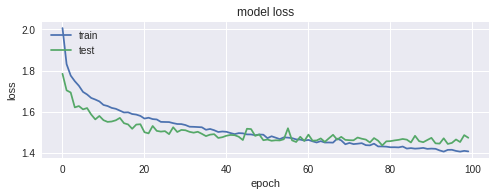

In [0]:
import matplotlib.pyplot as plt
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

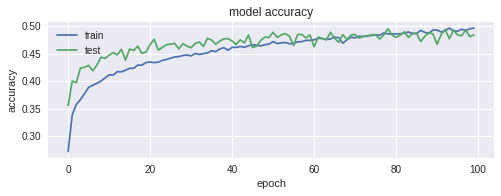

In [0]:

import matplotlib.pyplot as plt 
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

In [0]:
# Modify the following parameters and discuss the effect of changing parameters on loss and
#accuracy
#1. No of epochs--60

In [0]:
if __name__ == '__main__':
    nb_epoch = 60
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP2
    model2 = Sequential()
    model2.add(Dense(1024, input_shape=(3072, )))
    model2.add(Activation('relu'))
    model2.add(Dropout(0.2))
    model2.add(Dense(512))
    model2.add(Activation('relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    model2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model2.summary()

    # training
    history = model2.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss2, acc2 = model2.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss2)
    print('Test acc:', acc2)
    
    
    loss22, acc22 = model2.evaluate(X_test, Y_test, verbose=0)
    print('Train loss:', loss22)
    print('Train acc:', acc22)    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_7 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 5s 108us/step - loss: 2.0049 - acc: 0.2699 - val_loss: 1.8118 - val_acc: 0.3484
Epoch 2/60
50000/50000 [==============================] - 5s 99us/step - loss: 1.8429 - acc: 0.3306 - val_loss: 1.7037 - val_acc: 0.3931
Epoch 3/60
50000/50000 [==============================] - 5s 98us/step - loss: 1.7829 - acc: 0.3566 - val_loss: 1.6707 - val_acc: 0.4038
Epoch 4/60
50000/50000 [==============================] - 5s 97us/step - loss: 1.7511 - acc: 0.3651 - val_loss: 1.6716 - val_acc: 0.4060
Epoch 5/60
50000/50000 [==============================] - 5s 97us/step - loss: 1.7320 - acc: 0.3740 - val_loss: 1.6468 - val_acc: 0.4150
Epoch 6/60
50000/50000 [==============================] - 5s 98us/step - loss: 1.6951 - acc: 0.3862 - val_loss: 1.6126 - val_acc: 0.4298
Epoch 7/60
50000/50000 [==============================] - 5s 97us/step - loss: 1.6808 - acc: 0.3920 - val_loss: 1.6213 - val_ac

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,3072))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(Y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 12
The number of mistake: 88
A correct answer rate: 12.0 %


In [0]:
#2. Batch size

In [0]:
if __name__ == '__main__':
    nb_epoch = 100
    batch_size = 256
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model3 = Sequential()
    model3.add(Dense(1024, input_shape=(3072, )))
    model3.add(Activation('relu'))
    model3.add(Dropout(0.2))
    model3.add(Dense(512))
    model3.add(Activation('relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    model3.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model3.summary()

    # training
    history = model3.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model3.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)
    
train_loss,train_acc=model3.evaluate(X_train,Y_train,verbose=0)
print('Train loss:', train_loss)
print('Train acc:', train_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_10 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_11 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 69us/step - loss: 2.0409 - acc: 0.2613 - val_loss: 1.8270 - val_acc: 0.3578
Epoch 2/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.8232 - acc: 0.3409 - val_loss: 1.7084 - val_acc: 0.3947
Epoch 3/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.7626 - acc: 0.3660 - val_loss: 1.6890 - val_acc: 0.3996
Epoch 4/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.7190 - acc: 0.3864 - val_loss: 1.5958 - val_acc: 0.4418
Epoch 5/100
50000/50000 [==============================] - 3s 54us/step - loss: 1.6899 - acc: 0.3926 - val_loss: 1.6329 - val_acc: 0.4191
Epoch 6/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.6691 - acc: 0.3999 - val_loss: 1.5925 - val_acc: 0.4390
Epoch 7/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.6530 - acc: 0.4069 - val_loss: 1.5523 - 

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,3072))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(Y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 3
The number of mistake: 97
A correct answer rate: 3.0 %


In [0]:
if __name__ == '__main__':
    nb_epoch = 60
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model4 = Sequential()
    model4.add(Dense(1024, input_shape=(3072, )))
    model4.add(Activation('relu'))
    model4.add(Dropout(0.2))
    model4.add(Dense(512))
    model4.add(Activation('relu'))
    model4.add(Dropout(0.5))
    model4.add(Dense(10))
    model4.add(Activation('softmax'))
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
    model4.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    model4.summary()

    # training
    history = model4.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model4.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)
    
    loss_t,acc_t =model4.evaluate(X_train, Y_train, verbose=0)
    print('Train loss:', loss_t)
    print('Train acc:', acc_t)
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_13 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 5s 97us/step - loss: 1.9921 - acc: 0.2746 - val_loss: 1.8318 - val_acc: 0.3528
Epoch 2/60
50000/50000 [==============================] - 4s 89us/step - loss: 1.8128 - acc: 0.3525 - val_loss: 1.7289 - val_acc: 0.3915
Epoch 3/60
50000/50000 [==============================] - 4s 88us/step - loss: 1.7371 - acc: 0.3829 - val_loss: 1.6393 - val_acc: 0.4240
Epoch 4/60
50000/50000 [==============================] - 4s 89us/step - loss: 1.6869 - acc: 0.3992 - val_loss: 1.5948 - val_acc: 0.4354
Epoch 5/60
50000/50000 [==============================] - 4s 90us/step - loss: 1.6448 - acc: 0.4169 - val_loss: 1.6075 - val_acc: 0.4262
Epoch 6/60
50000/50000 [==============================] - 4s 89us/step - loss: 1.6078 - acc: 0.4323 - val_loss: 1.5746 - val_acc: 0.4448
Epoch 7/60
50000/50000 [==============================] - 4s 89us/step - loss: 1.5757 - acc: 0.4407 - val_loss: 1.5200 - val_acc

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,3072))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(Y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 12
The number of mistake: 88
A correct answer rate: 12.0 %


In [0]:
#3. Network configuration
#a. Number of neurons in a layer
#b. Number of layers

In [0]:
if __name__ == '__main__':
    nb_epoch = 200
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model5 = Sequential()
    model5.add(Dense(1024, input_shape=(3072, )))
    model5.add(Activation('relu'))
    model5.add(Dropout(0.2))
    
              
    model5.add(Dense(512))
    model5.add(Activation('relu'))
    model5.add(Dropout(0.5))
    model5.add(Dense(512))
    model5.add(Activation('relu'))
    model5.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_4 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 121us/step - loss: 2.1261 - acc: 0.2624 - val_loss: 2.0244 - val_acc: 0.3285
Epoch 2/200
50000/50000 [==============================] - 5s 105us/step - loss: 1.9587 - acc: 0.3380 - val_loss: 1.8953 - val_acc: 0.3591
Epoch 3/200
50000/50000 [==============================] - 5s 105us/step - loss: 1.8534 - acc: 0.3639 - val_loss: 1.8089 - val_acc: 0.3735
Epoch 4/200
50000/50000 [==============================] - 5s 105us/step - loss: 1.7782 - acc: 0.3782 - val_loss: 1.7400 - val_acc: 0.4006
Epoch 5/200
50000/50000 [==============================] - 5s 105us/step - loss: 1.7268 - acc: 0.3938 - val_loss: 1.7124 - val_acc: 0.4028
Epoch 6/200
50000/50000 [==============================] - 5s 104us/step - loss: 1.6921 - acc: 0.4037 - val_loss: 1.6815 - val_acc: 0.4148
Epoch 7/200
50000/50000 [==============================] - 5s 105us/step - loss: 1.6658 - acc: 0.4114 - val_loss: 1.

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,3072))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(Y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 14
The number of mistake: 86
A correct answer rate: 14.000000000000002 %


In [0]:
if __name__ == '__main__':
    nb_epoch = 100
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_24 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.9650 - acc: 0.2805 - val_loss: 1.7642 - val_acc: 0.3661
Epoch 2/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.8160 - acc: 0.3422 - val_loss: 1.6891 - val_acc: 0.4004
Epoch 3/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.7624 - acc: 0.3629 - val_loss: 1.6816 - val_acc: 0.3994
Epoch 4/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.7193 - acc: 0.3770 - val_loss: 1.6300 - val_acc: 0.4182
Epoch 5/100
50000/50000 [==============================] - 5s 105us/step - loss: 1.6844 - acc: 0.3906 - val_loss: 1.6077 - val_acc: 0.4303
Epoch 6/100
50000/50000 [==============================] - 5s 105us/step - loss: 1.6487 - acc: 0.4039 - val_loss: 1.5671 - val_acc: 0.4440
Epoch 7/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.6385 - acc: 0.4076 - val_loss: 1.

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,3072))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(Y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 10
The number of mistake: 90
A correct answer rate: 10.0 %


In [0]:
#Learning rate and Optimizers
from keras.optimizers import SGD,RMSprop,Adagrad,Adam,Adadelta

In [0]:
if __name__ == '__main__':
    nb_epoch = 100
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)
    
loss_t, acc_t = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', loss_t)
print('Train acc:', acc_t)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_31 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_32 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 96us/step - loss: 14.3987 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 4s 84us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 4s 83us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 4s 83us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 4s 83us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 4s 83us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 4s 84us/step - loss: 14.5063 - acc: 0.1000 - val_lo

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,3072))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(Y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 9
The number of mistake: 91
A correct answer rate: 9.0 %


In [0]:
if __name__ == '__main__':
    nb_epoch = 60
    batch_size = 128
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0,
                amsgrad=False)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)
    
loss_t, acc_t = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', loss_t)
print('Train acc:', acc_t)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_34 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_35 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 6s 118us/step - loss: 2.1117 - acc: 0.2155 - val_loss: 1.9261 - val_acc: 0.3117
Epoch 2/60
50000/50000 [==============================] - 5s 100us/step - loss: 2.0097 - acc: 0.2441 - val_loss: 1.9613 - val_acc: 0.2910
Epoch 3/60
50000/50000 [==============================] - 5s 100us/step - loss: 1.9819 - acc: 0.2591 - val_loss: 1.9063 - val_acc: 0.3350
Epoch 4/60
50000/50000 [==============================] - 5s 100us/step - loss: 1.9440 - acc: 0.2746 - val_loss: 1.9095 - val_acc: 0.3331
Epoch 5/60
50000/50000 [==============================] - 5s 100us/step - loss: 1.9277 - acc: 0.2814 - val_loss: 1.8909 - val_acc: 0.3442
Epoch 6/60
50000/50000 [==============================] - 5s 100us/step - loss: 1.9119 - acc: 0.2865 - val_loss: 1.9079 - val_acc: 0.3386
Epoch 7/60
50000/50000 [==============================] - 5s 100us/step - loss: 1.8954 - acc: 0.2983 - val_loss: 1.8784 - 

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,3072))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(Y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 8
The number of mistake: 92
A correct answer rate: 8.0 %


In [0]:
if __name__ == '__main__':
    nb_epoch = 150
    batch_size = 256
    nb_classes = 10

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    X_train = X_train.reshape(50000, 32 * 32 * 3)
    X_test = X_test.reshape(10000, 32 * 32 * 3)

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)

    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()

    # training
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        nb_epoch=nb_epoch,
                        verbose=1,
                        validation_data=(X_test, Y_test))

    save_history(history, 'history.txt')

    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', loss)
    print('Test acc:', acc)
    
loss_t, acc_t = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', loss_t)
print('Train acc:', acc_t)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_37 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_38 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               262656    
__________

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 4s 75us/step - loss: 2.3254 - acc: 0.1705 - val_loss: 2.0356 - val_acc: 0.2473
Epoch 2/150
50000/50000 [==============================] - 3s 57us/step - loss: 2.0365 - acc: 0.2462 - val_loss: 1.9294 - val_acc: 0.3187
Epoch 3/150
50000/50000 [==============================] - 3s 57us/step - loss: 1.9774 - acc: 0.2745 - val_loss: 1.9493 - val_acc: 0.3348
Epoch 4/150
50000/50000 [==============================] - 3s 57us/step - loss: 1.9277 - acc: 0.2963 - val_loss: 1.8892 - val_acc: 0.3306
Epoch 5/150
50000/50000 [==============================] - 3s 58us/step - loss: 1.9028 - acc: 0.3092 - val_loss: 1.9207 - val_acc: 0.3424
Epoch 6/150
50000/50000 [==============================] - 3s 57us/step - loss: 1.8814 - acc: 0.3161 - val_loss: 1.9005 - val_acc: 0.3497
Epoch 7/150
50000/50000 [==============================] - 3s 57us/step - loss: 1.8712 - acc: 0.3202 - val_loss: 1.9167 - 

In [0]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(3072).reshape((1,3072))
    c[0] = img
    return c
  
right = 0
mistake = 0
import random
for i in range(100):
    index = random.randint(0, X_test.shape[0])
    image = X_test[index]
    #print(index)
    data = convertCIFER10Data(image)

  
    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    i = np.array(list(Y_test[index]).index(1))
    if i == bestclass:
        #print(i)
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 14
The number of mistake: 86
A correct answer rate: 14.000000000000002 %


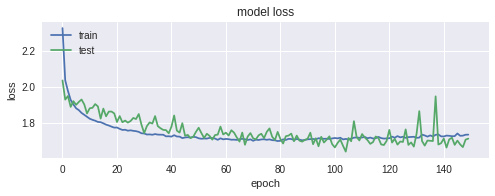

In [0]:
import matplotlib.pyplot as plt
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

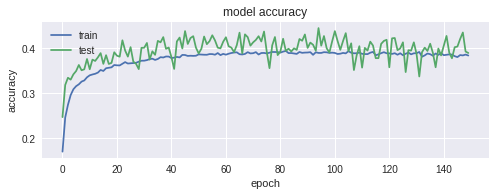

In [0]:
import matplotlib.pyplot as plt 
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

In [0]:
#model.save("C:\\Users\\Manasa\\Desktop\\Srikanth Assignment\\cifar.h5")

model.save('model2.h5')

from google.colab import files
files.download("model2.h5")

In [0]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("model_n.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_nu.h5")